# K-Nearest Neighbor

Sheny Lin・2/25/2023

### This assignment is to apply K-Nearest Neighbor on the BMD dataset and compare its accuracy to logistic regression. 

## Determine the optimal K - square root of N (method #1)

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
#load dataset
BMD = pd.read_csv('https://raw.githubusercontent.com/shenylin/Data-Science/main/BMD%20-%201.csv')
print(BMD)

        id    age  weight_kg  height_cm   bmd  fracture
0      469  57.05       64.0      155.5  0.88       0.0
1     8724  75.74       78.0      162.0  0.79       0.0
2     6736  70.78       73.0      170.5  0.91       0.0
3    24180  78.25       60.0      148.0  0.71       0.0
4    17072  54.19       55.0      161.0  0.79       0.0
..     ...    ...        ...        ...   ...       ...
164  21892  77.98       74.0      164.0  0.79       1.0
165  24140  50.29       59.0      161.0  0.80       1.0
166   6969  46.36       67.0      169.0  0.80       1.0
167   5505  54.79       70.0      166.0  0.81       1.0
168     71  69.99       68.5      165.0  0.87       1.0

[169 rows x 6 columns]


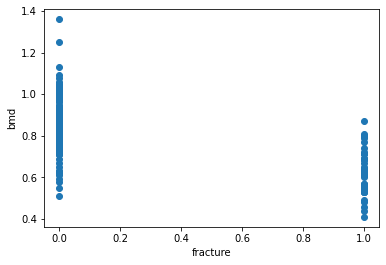

In [3]:
#Scatter Plot
plt.scatter(BMD['fracture'], BMD['bmd'])
plt.xlabel('fracture')
plt.ylabel('bmd')
plt.show()

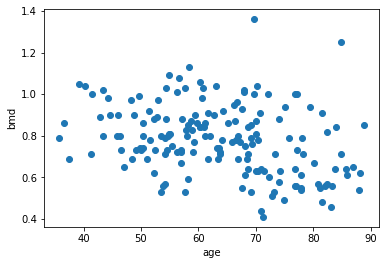

In [4]:
#Scatter Plot
plt.scatter(BMD['age'], BMD['bmd'])
plt.xlabel('age')
plt.ylabel('bmd')
plt.show()

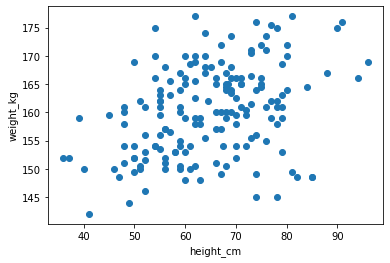

In [5]:
#Scatter Plot
plt.scatter(BMD['weight_kg'], BMD['height_cm'])
plt.xlabel('height_cm')
plt.ylabel('weight_kg')
plt.show()

In [6]:
BMD

,id,age,weight_kg,height_cm,bmd,fracture
0,469,57.05,64.0,155.5,0.88,0.0
1,8724,75.74,78.0,162.0,0.79,0.0
2,6736,70.78,73.0,170.5,0.91,0.0
3,24180,78.25,60.0,148.0,0.71,0.0
4,17072,54.19,55.0,161.0,0.79,0.0
...,...,...,...,...,...,...
164,21892,77.98,74.0,164.0,0.79,1.0
165,24140,50.29,59.0,161.0,0.80,1.0
166,6969,46.36,67.0,169.0,0.80,1.0
167,5505,54.79,70.0,166.0,0.81,1.0


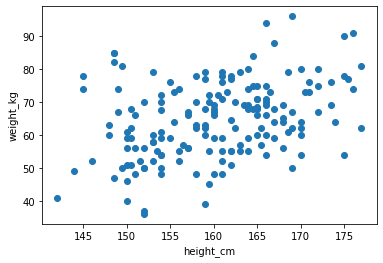

In [7]:
#Normalize X
#min_max_scaler = MinMaxScaler()
#[['age', 'weight_kg', 'height_cm']] = min_max_scaler.fit_transform(BMD[['age', 'weight_kg', 'height_cm']])

#Scatter Plot X
plt.scatter(BMD['height_cm'], BMD['weight_kg'])
plt.xlabel('height_cm')
plt.ylabel('weight_kg')
plt.show()

In [8]:
#Set Features and Target Variable
X = BMD[['age', 'weight_kg', 'height_cm', 'bmd']]
Y = BMD['fracture']

Accuracy:  0.7810650887573964


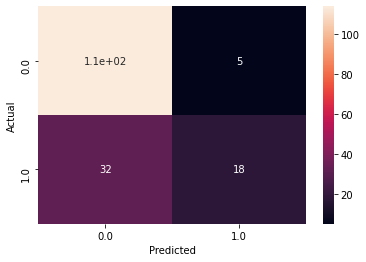

       age  weight_kg  height_cm   bmd
0    57.05       64.0      155.5  0.88
1    75.74       78.0      162.0  0.79
2    70.78       73.0      170.5  0.91
3    78.25       60.0      148.0  0.71
4    54.19       55.0      161.0  0.79
..     ...        ...        ...   ...
164  77.98       74.0      164.0  0.79
165  50.29       59.0      161.0  0.80
166  46.36       67.0      169.0  0.80
167  54.79       70.0      166.0  0.81
168  69.99       68.5      165.0  0.87

[169 rows x 4 columns]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 

ValueError: query data dimension must match training data dimension

In [9]:
#create a classifier
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X, Y)
Y_pred=knn.predict(X)
confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], 
colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

print (X)
print (Y_pred)
prediction = knn.predict([[161,61]]) 
print ('Predicted Result: ', prediction)
print(classification_report(Y, Y_pred))

Accuracy:  0.7928994082840237


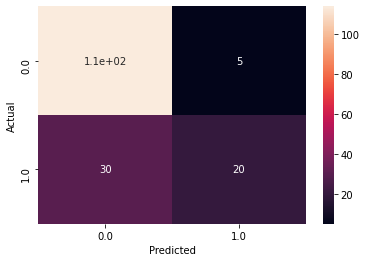

       age  weight_kg  height_cm   bmd
0    57.05       64.0      155.5  0.88
1    75.74       78.0      162.0  0.79
2    70.78       73.0      170.5  0.91
3    78.25       60.0      148.0  0.71
4    54.19       55.0      161.0  0.79
..     ...        ...        ...   ...
164  77.98       74.0      164.0  0.79
165  50.29       59.0      161.0  0.80
166  46.36       67.0      169.0  0.80
167  54.79       70.0      166.0  0.81
168  69.99       68.5      165.0  0.87

[169 rows x 4 columns]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 

ValueError: query data dimension must match training data dimension

In [10]:
#create a classifier
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X, Y)
Y_pred=knn.predict(X)
confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], 
colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

print (X)
print (Y_pred)
prediction = knn.predict([[161,61]]) 
print ('Predicted Result: ', prediction)
print(classification_report(Y, Y_pred))

Accuracy:  0.7869822485207101


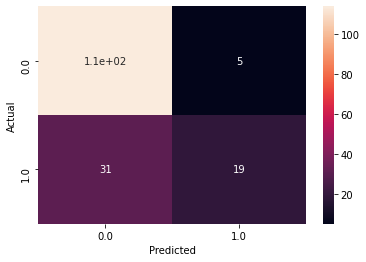

       age  weight_kg  height_cm   bmd
0    57.05       64.0      155.5  0.88
1    75.74       78.0      162.0  0.79
2    70.78       73.0      170.5  0.91
3    78.25       60.0      148.0  0.71
4    54.19       55.0      161.0  0.79
..     ...        ...        ...   ...
164  77.98       74.0      164.0  0.79
165  50.29       59.0      161.0  0.80
166  46.36       67.0      169.0  0.80
167  54.79       70.0      166.0  0.81
168  69.99       68.5      165.0  0.87

[169 rows x 4 columns]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 

ValueError: query data dimension must match training data dimension

In [11]:
#create a classifier
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(X, Y)
Y_pred=knn.predict(X)
confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], 
colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

print (X)
print (Y_pred)
prediction = knn.predict([[161,61]]) 
print ('Predicted Result: ', prediction)
print(classification_report(Y, Y_pred))

## Determine the optimal K - Calculate and plot error rate versus K values (method #2)

In [12]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error Rate')

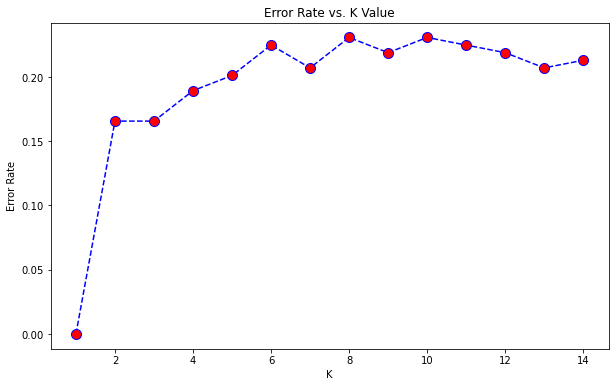

In [13]:
#Determine classifier error rate
error_rate = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, Y)
    #Y_pred=knn.predict(X)
    pred_i = knn.predict(X)
    error_rate.append(np.mean(pred_i != Y))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Accuracy:  0.7928994082840237


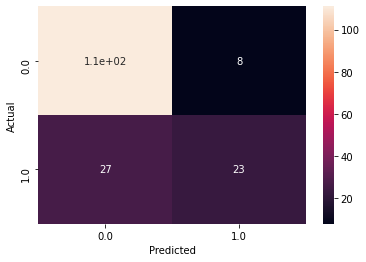

       age  weight_kg  height_cm   bmd
0    57.05       64.0      155.5  0.88
1    75.74       78.0      162.0  0.79
2    70.78       73.0      170.5  0.91
3    78.25       60.0      148.0  0.71
4    54.19       55.0      161.0  0.79
..     ...        ...        ...   ...
164  77.98       74.0      164.0  0.79
165  50.29       59.0      161.0  0.80
166  46.36       67.0      169.0  0.80
167  54.79       70.0      166.0  0.81
168  69.99       68.5      165.0  0.87

[169 rows x 4 columns]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 

ValueError: query data dimension must match training data dimension

In [14]:
#create a classifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X, Y)
Y_pred=knn.predict(X)
confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], 
colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

print (X)
print (Y_pred)
prediction = knn.predict([[161,61]]) 
print ('Predicted Result: ', prediction)
print(classification_report(Y, Y_pred))

## Logistic Regression

In [15]:
#import libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

#LogisticRegression_CrossValidation
from sklearn.model_selection import cross_val_score

#LogisticRegressionDS_TrainTest
from sklearn.model_selection import train_test_split

In [16]:
#load dataset
BMD = pd.read_csv('https://raw.githubusercontent.com/shenylin/Data-Science/main/BMD%20-%201.csv')
print(BMD)

        id    age  weight_kg  height_cm   bmd  fracture
0      469  57.05       64.0      155.5  0.88       0.0
1     8724  75.74       78.0      162.0  0.79       0.0
2     6736  70.78       73.0      170.5  0.91       0.0
3    24180  78.25       60.0      148.0  0.71       0.0
4    17072  54.19       55.0      161.0  0.79       0.0
..     ...    ...        ...        ...   ...       ...
164  21892  77.98       74.0      164.0  0.79       1.0
165  24140  50.29       59.0      161.0  0.80       1.0
166   6969  46.36       67.0      169.0  0.80       1.0
167   5505  54.79       70.0      166.0  0.81       1.0
168     71  69.99       68.5      165.0  0.87       1.0

[169 rows x 6 columns]


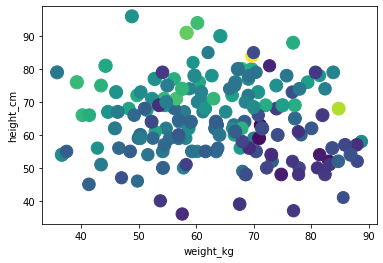

In [17]:
#Scatter Plot
plt.scatter(BMD['age'], BMD['weight_kg'], BMD['height_cm'], BMD['bmd'])
plt.xlabel('weight_kg')
plt.ylabel('height_cm')
plt.show()

In [18]:
#Set Features and Target Variable
X = BMD[['age', 'weight_kg', 'height_cm', 'bmd']]
Y = BMD['fracture']

In [19]:
#Create classifier
logistic_regression= LogisticRegression(penalty='l1', solver='liblinear') #L1: Lasso Regression

In [20]:
logistic_regression= LogisticRegression(penalty='l2', solver='liblinear') #L2: Ridge Regression

[-0.24065668] [[ 0.04675251 -0.06114481  0.01590842 -3.1252597 ]]
Accuracy:  0.8284023668639053


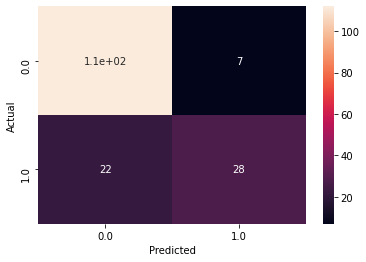

In [21]:
logistic_regression.fit(X,Y)
Y_pred=logistic_regression.predict(X)

print(logistic_regression.intercept_, logistic_regression.coef_)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

In [22]:
#print (X)
print (Y_pred)

print(classification_report(Y, Y_pred))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0.]
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89       119
         1.0       0.80      0.56      0.66        50

    accuracy                           0.83       169
   macro avg       0.82      0.75      0.77       169
weighted avg       0.83      0.83      0.82       169



Cross-Validation Accuracy [0.94117647 0.85294118 0.91176471 0.79411765 0.63636364]
Coefficients [-0.24065668] [[ 0.04675251 -0.06114481  0.01590842 -3.1252597 ]]
Accuracy:  0.8284023668639053


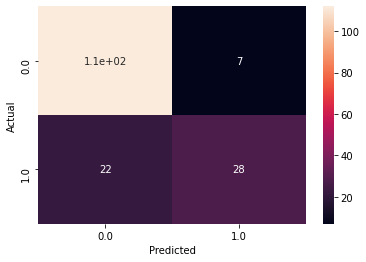

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89       119
         1.0       0.80      0.56      0.66        50

    accuracy                           0.83       169
   macro avg       0.82      0.75      0.77       169
weighted avg       0.83      0.83      0.82       169



In [23]:
#results = cross_val_score(logistic_regression, X, Y, cv=kfold)
results = cross_val_score(logistic_regression, X, Y, cv=5)
print('Cross-Validation Accuracy', results)

print('Coefficients', logistic_regression.intercept_, logistic_regression.coef_)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

print(classification_report(Y, Y_pred))

Coefficients [0.] [[ 0.03592928 -0.02866627  0.03350983 -9.0375358 ]]
Accuracy:  0.8431372549019608


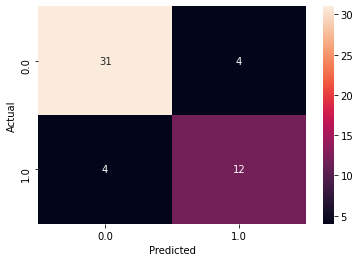

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        35
         1.0       0.75      0.75      0.75        16

    accuracy                           0.84        51
   macro avg       0.82      0.82      0.82        51
weighted avg       0.84      0.84      0.84        51



In [24]:
#Split Features and Target Variables into Train and Test Sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=0)

#Create classifier
logistic_regression= LogisticRegression(penalty='l1', solver='liblinear')
#logistic_regression= LogisticRegression(penalty='l2', solver='liblinear')
logistic_regression.fit(X_train,Y_train)
Y_pred=logistic_regression.predict(X_test)

print('Coefficients', logistic_regression.intercept_, logistic_regression.coef_)

confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

#print (X_test)
#print (Y_pred)

print(classification_report(Y_test, Y_pred))

## Write-up


### In your write-up, provide an explanation of the results, including classification accuracy, the number of patients misclassified for each class/target, and compare its accuracy to logistic regression. In addition, show and explain how K was determined.

1. Classification accuracy: 0.79 when the K value is 13.
2. Number of patients misclassified for each class/target: 30 patients misclassified as false negative and 5 patients misclassified as false positive.
3. Compared to logistic regression that reached 0.85 classification accuracy, in this case, K-Nearest Neighbor performed worse. In the previous logistic regression, 16 patients misclassified as false negative and 8 patients misclassified as false positive. 


### Observations about the dataset and/or results
1. How to determine an optimal K values? It's tricky to determine an optimal value for KNN so I adopted two methods to determine the K values. First of all, I used the square root of sample numbers and get 13. Second, I also calculate error rate. That said, I tried out different K numbers and found that the odd numbers 7, 13 generate a slightly better accuracy (0.79) whereas the even numbers, 12, 14, generate a slightly lower accuracy (0.78). 

2. Why in this case logistic regression reached a higher accuracy (0.85) than KNN (0.79)? I figure it is because logistic regression is sensitive to the "relevant" factors and in this case, bone mineral density (bmd) is the sole factor that determine how risky of a patient gets bone fracture. KNN considers all factors equally and it leads to a less accurate classification in this case. 

# Reference
1. TshirtKNN_Error.py and TshirtKNN.py scripts created by Dr. Renee Hendricks
2. https://www.globaltechcouncil.org/machine-learning/logistic-regression-vs-k-nearest-neighbours-vs-support-vector-machine/
3. https://pubmed.ncbi.nlm.nih.gov/15025843/#:~:text=Although%20BMD%20may%20increase%20with,strength%20and%20fracture%20risk%20reduction.
